COMP 215 - LAB 3
----------------
#### Name(s):
#### Date:

By the end of this lab you should be able to:
  * use a `class` to organize related data and functions
  * identify a `record` as a related collection of data, with fields for each data value

During this lab, you will be introduced to the following:
  * the `class` keyword allows you define a new data `type`, with a set of operations on that data.
  * a `dataclass` simplifies class definition for classes that primarily encapsulate a data structure.



## Near Earth Objects (with classes)

We'll continue working with Near Earth Object data using NASA's API: https://api.nasa.gov/ Here's a brief review from Lab 2 on how to use it.

In [1]:
# import necessary modules
import datetime, json, requests
from pprint import pprint

### Review: make an API query

Here's a query that gets the record for a single NEO that recently passed by.

In [2]:
#API_KEY = 'DEMO_KEY'  # substitute your API key here
API_KEY = 'QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo'

def get_neos(start_date):
    """ Return a list of NEO for the week starting at start_date """
    url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date={start_date}&api_key={API_KEY}'
    # Fetch last week's NEO feed
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    pprint(data)
    print(f'{data["element_count"]} Near Earth Objects found for week of {start_date}')
    return [neo for dated_records in data['near_earth_objects'].values() for neo in dated_records ]

def get_neo(id):
    """ Return a NEO record for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    return json.loads(response.text)

week_start = '2023-01-15'
neos = get_neos(week_start)
assert len(neos) > 0, f'Oh oh!  No NEOs found for {week_start}'
neo = get_neo(neos[-1]['id'])  # get the very latest NEO
pprint(neo)

{'element_count': 118,
 'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-22&end_date=2023-01-29&detailed=false&api_key=QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo',
           'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-08&end_date=2023-01-15&detailed=false&api_key=QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo',
           'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2023-01-15&end_date=2023-01-22&detailed=false&api_key=QMU73gySBTeUk6FVRje8eMwNOFfI1FZOwRtlf0Xo'},
 'near_earth_objects': {'2023-01-15': [{'absolute_magnitude_h': 18.6,
                                        'close_approach_data': [{'close_approach_date': '2023-01-15',
                                                                 'close_approach_date_full': '2023-Jan-15 '
                                                                                             '21:05',
                                                                 'epoch_date_close_approach': 1

In [11]:
neo = get_neo('54339874')
pprint(neo['orbital_data']['orbital_period'])

'404.2864725343965'


## Exercise 1:  Define an Asteroid class

Define a simple Asteroid class with some basic state variables for a single NEO.  Your Asteroid class should define at least 4 "state variables:”

    id
    name
    estimated_diameter (m)
    is_potentially_hazardous (bool)

Operations must include:
* `__init__(self, ...)` method to initialize a new Asteroid object with specific data values
* `__str__(self)`, and `__repr__(self)` methods that return nicely formatted string representations of the object.
  
OR...
use a `@dataclass` and it will supply most of that boilerplate code for you!

Write a little code to test your new class.

In [5]:
# Ex.1 your code here
from dataclasses import dataclass

@dataclass
class Asteroid:
  id: int
  name: str
  est_diameter: float
  is_pot_hazardous: bool


a = Asteroid(id=5,name='frank',est_diameter=100,is_pot_hazardous=True)
b = Asteroid(id=6,name='bill',est_diameter=200,is_pot_hazardous=False)
print(a,b)

Asteroid(id=5, name='frank', est_diameter=100, is_pot_hazardous=True) Asteroid(id=6, name='bill', est_diameter=200, is_pot_hazardous=False)


## Exercise 2: Factory method: Asteriod.from_NEO

We want to be able to construct Asteroid objects easily from the record returned from the NEO API.  

Add an "object factory" method to your class...   

    @classmethod
    from_NEO(cls, neo_id):
        ...

that takes the id for a single NEO, fetches the NEO record from API, constructs and returns an Asteroid object representing that NEO.
This kind of method is called a “Factory” because it constructs an object from raw materials.

Write a little code to test your new class.

In [3]:
# Ex. 2 your code here
from dataclasses import dataclass

@dataclass
class Asteroid:
  id: int
  name: str
  est_diameter: float
  is_pha: bool

  @classmethod
  def from_NEO(cls, neo_id):
    """ Return an Asteroid object for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{neo_id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    return cls(id=data['id'],
               name=data['name'],
               est_diameter=data['estimated_diameter']['meters']['estimated_diameter_max'],
               is_pha=data['is_potentially_hazardous_asteroid'])


a = Asteroid.from_NEO('54339874')
print(a)

Asteroid(id='54339874', name='(2023 BM1)', est_diameter=63.3928064522, is_pha=False)


## Exercise 3:
Make a histogram of the asteroid diameters.

In [5]:
asteroids = []
for neo in neos:
  print('getting asteroid',neo['id'])
  asteroids.append(Asteroid.from_NEO(neo['id']))


#asteroids = [Asteroid.from_NEO(neo['id']) for neo in neos]
#data = [asteroid.est_diameter for asteroid in asteroids]
print(asteroids)

getting asteroid 3370021
getting asteroid 3554439
getting asteroid 3767162
getting asteroid 3883106
getting asteroid 54110694
getting asteroid 54137811
getting asteroid 54336231
getting asteroid 54338828
getting asteroid 54339972
getting asteroid 54340099
getting asteroid 54340444
getting asteroid 54340712
getting asteroid 54341485
getting asteroid 54341543
getting asteroid 2139345
getting asteroid 3392297
getting asteroid 3555677
getting asteroid 3734647
getting asteroid 54087767
getting asteroid 54328941
getting asteroid 54335605
getting asteroid 54338712
getting asteroid 54339963
getting asteroid 54340042
getting asteroid 54340261
getting asteroid 54340276
getting asteroid 54340801
getting asteroid 54487279
getting asteroid 2483422
getting asteroid 3402610
getting asteroid 3581556
getting asteroid 3792468
getting asteroid 54051141
getting asteroid 54099945
getting asteroid 54121906
getting asteroid 54225504
getting asteroid 54234943
getting asteroid 2613939
getting asteroid 54291304

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

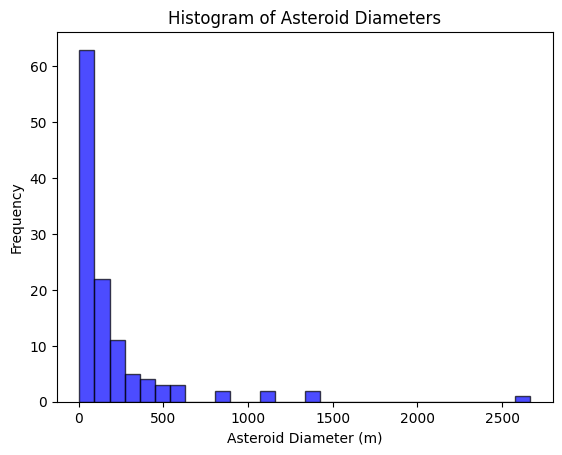

In [7]:
data = [asteroid.est_diameter for asteroid in asteroids]
plt.hist(data, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Asteroid Diameter (m)')
plt.ylabel('Frequency')
plt.title('Histogram of Asteroid Diameters')
plt.show()

## Exercise 4:

Add orbital period, compare diameter to period...

In [12]:

# Ex. 2 your code here
from dataclasses import dataclass

@dataclass
class Asteroid:
  id: int
  name: str
  estimated_diameter: float
  orbital_period: float
  is_pha: bool

  @classmethod
  def from_NEO(cls, neo_id):
    """ Return an Asteroid object for the given id """
    url = f'https://api.nasa.gov/neo/rest/v1/neo/{neo_id}?api_key={API_KEY}'
    response = requests.request("GET", url, headers={}, data={})
    data = json.loads(response.text)
    return cls(id=data['id'],
               name=data['name'],
               estimated_diameter=data['estimated_diameter']['meters']['estimated_diameter_max'],
               orbital_period=data['orbital_data']['orbital_period'],
               is_pha=data['is_potentially_hazardous_asteroid'])

asteroids = []
for neo in neos:
  print('getting asteroid',neo['id'])
  asteroids.append(Asteroid.from_NEO(neo['id']))



getting asteroid 3370021
getting asteroid 3554439
getting asteroid 3767162
getting asteroid 3883106
getting asteroid 54110694
getting asteroid 54137811
getting asteroid 54336231
getting asteroid 54338828
getting asteroid 54339972
getting asteroid 54340099
getting asteroid 54340444
getting asteroid 54340712
getting asteroid 54341485
getting asteroid 54341543
getting asteroid 2139345
getting asteroid 3392297
getting asteroid 3555677
getting asteroid 3734647
getting asteroid 54087767
getting asteroid 54328941
getting asteroid 54335605
getting asteroid 54338712
getting asteroid 54339963
getting asteroid 54340042
getting asteroid 54340261
getting asteroid 54340276
getting asteroid 54340801
getting asteroid 54487279
getting asteroid 2483422
getting asteroid 3402610
getting asteroid 3581556
getting asteroid 3792468
getting asteroid 54051141
getting asteroid 54099945
getting asteroid 54121906
getting asteroid 54225504
getting asteroid 54234943
getting asteroid 2613939
getting asteroid 54291304

AttributeError: 'Asteroid' object has no attribute 'est_diameter'

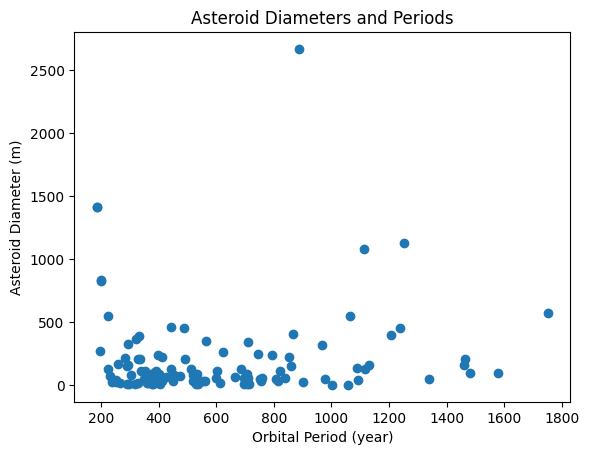

In [19]:
data_x = [float(asteroid.orbital_period) for asteroid in asteroids]
data_y = [float(asteroid.estimated_diameter) for asteroid in asteroids]
plt.scatter(data_x, data_y)
plt.xlabel('Orbital Period (year)')
plt.ylabel('Asteroid Diameter (m)')
plt.title('Asteroid Diameters and Periods')
plt.show()

## Exercise 3:

## Exercise 3: Define a CloseApproach class

Each NEO record comes with a list of `close_approach_data`, where each record in this list represents a single “close approach” to another orbiting body.
* Develop a class named `CloseApproach` to represent a single close approach record.
* State variables are

        neo (refrence to related NEO object)
        orbiting body (str)
        approach date (datetime object!)
        miss distance (float - choose units, document it, and be consistent!)
        relative velocity (ditto)
  
Define a "Factory" class method to construct a `CloseApproach` object from one close approach data record (a dictionary object).   
This method takes a `neo` object as input for the NEO to which the close approach data belongs.
Remember to parse the date/time string into a datetime object.

In [ ]:
# Ex. 3 your code here

## Exercise 4: Add list of CloseApproach objects to the Asteroid

Every `Asteroid` should have a list of “close approaches”.
But there is a catch-22 here because we need the `Asteroid` to construct the `CloseApproach` objects.
Add an instance variable to your Asteroid class with a default value of an empty list:

    ...
    close_approaches:list = []
    ...
      
In `from_NEO` factory, use a list comprehension to build the list of `CloseApproach` objects for the Asteroid instance, and then set the instance's `close_approaches` variable before returning it.  
Setting the value of an object's instance variables from outside the class is generally frowned upon - this is why we make the factory a method of the class itself!

Now add a method to `Asteroid` to return the `nearest_miss` `CloseApproach` object for the asteroic:

    def nearest_miss(self):
        ...

Extend your test code to demonstrate these new features.

In [ ]:
# Ex. 4 your code here

## Challenge - Take your skills to the next level...
### Exercise 5: add one additional analysis

 With these data structures in place, we can now start answering all kinds of interesting questions about a single Asteroid or a set of Asteroids.  
Here’s a couple ideas to try:

* add a method to the Asteroid class, `closest_earth_approach`, that returns the CloseApproach object that represents the closest approach the Asteroid makes to Earth.

* write a **function** named `most_dangerous_approach`, that takes a date range and returns a single “potentially hazardous” Asteroid object that makes the closest approach to Earth in within that range.  Your algorithm will ultimately need to:
    * grab the list of NEO’s for the given date range;
    * use a list comprehension to build the list of Asteroid objects for the NEO’s returned
    * use a list comprehension to filter  potentially hazardous Asteroids only;
    * use a list comprehension to map each Asteroid to its  closest_earth_approach
    * apply Python’s min function to identify the Asteroid with the closest_earth_approach

You may want to decompose some of these steps into smaller functions.
* add a method to the Asteroid class, estimated_mass, that computes an estimate of the Asteroid’s mass based on its diameter.  This is a model – state your assumptions.
* add a method to the CloseApproach class, impact_force,  that estimates the force of impact if the Asteroid hit the orbiting object.  Again, this is a model, state your assumptions.

In [ ]:
# Ex. 5 (challenge) your code here